### Obesity - Multiclass Classification


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
print(df.columns)
print("------------------------------------------------------")
print(df.dtypes)
print("------------------------------------------------------")
print(df.shape)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
------------------------------------------------------
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object
-

In [4]:
def detail_info(data):
    temp_df = pd.DataFrame(index= data.columns)
    
    temp_df['data_type'] = data.dtypes
    temp_df['unique_val'] = data.nunique()
    temp_df['duplicate_val'] = data.duplicated().sum()
    temp_df['missing_val'] = data.isnull().sum()
    temp_df['missing_val_%'] = round(data.isnull().mean()*100,2)
    
    return temp_df

detail_info(df)

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
Gender,object,2,24,0,0.0
Age,float64,1402,24,0,0.0
Height,float64,1574,24,0,0.0
Weight,float64,1525,24,0,0.0
family_history_with_overweight,object,2,24,0,0.0
FAVC,object,2,24,0,0.0
FCVC,float64,810,24,0,0.0
NCP,float64,635,24,0,0.0
CAEC,object,4,24,0,0.0
SMOKE,object,2,24,0,0.0


In [5]:
df.drop_duplicates(keep ='first', inplace=True)
df.reset_index(drop=True, inplace=True)

detail_info(df)

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
Gender,object,2,0,0,0.0
Age,float64,1402,0,0,0.0
Height,float64,1574,0,0,0.0
Weight,float64,1525,0,0,0.0
family_history_with_overweight,object,2,0,0,0.0
FAVC,object,2,0,0,0.0
FCVC,float64,810,0,0,0.0
NCP,float64,635,0,0,0.0
CAEC,object,4,0,0,0.0
SMOKE,object,2,0,0,0.0


In [6]:
df.NObeyesdad.value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64

As per given problem statement converting output variables into 5 classes

In [7]:
category_mapping = {"Normal_Weight": "Normal",
                    "Overweight_Level_I": "Overweight",
                    "Overweight_Level_II": "Overweight",
                    "Obesity_Type_I": "Obesity",
                    "Obesity_Type_II": "Obesity",
                    "Obesity_Type_III": "Extreme Obesity",
                    "Insufficient_Weight": "Underweight",
                    
                }

df["NObeyesdad"] = df["NObeyesdad"].map(category_mapping)
df.NObeyesdad.value_counts()

Obesity            648
Overweight         566
Extreme Obesity    324
Normal             282
Underweight        267
Name: NObeyesdad, dtype: int64

In [8]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight


In [9]:
# Calculate BMI (Body Mass Index)
df["BMI"] = df["Weight"] / ((df["Height"]/100) ** 2)

In [10]:
string_features = []
for feature in df.columns:
    if df[feature].dtype == "O":
        string_features.append(feature)       

string_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [11]:
# Encoding the output feature

def feature_encoding(df, col):
    temp_list = list(sorted(df[col].unique()))
    return dict(zip(temp_list, range(len(temp_list))))  

In [12]:
transformed_dict = {} 

for feature in df[string_features]:
    feature_dict = feature_encoding(df, feature)
    transformed_dict[feature] = feature_dict

    df[feature] = df[feature].map(feature_dict)

In [13]:
transformed_dict

{'Gender': {'Female': 0, 'Male': 1},
 'family_history_with_overweight': {'no': 0, 'yes': 1},
 'FAVC': {'no': 0, 'yes': 1},
 'CAEC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3},
 'SMOKE': {'no': 0, 'yes': 1},
 'SCC': {'no': 0, 'yes': 1},
 'CALC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3},
 'MTRANS': {'Automobile': 0,
  'Bike': 1,
  'Motorbike': 2,
  'Public_Transportation': 3,
  'Walking': 4},
 'NObeyesdad': {'Extreme Obesity': 0,
  'Normal': 1,
  'Obesity': 2,
  'Overweight': 3,
  'Underweight': 4}}

In [14]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,243865.264441
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,242382.271468
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,237654.320988
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,3,268518.518519
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,3,283423.810125


In [15]:
for feature, feature_dict in transformed_dict.items():
    print(f"{feature} dictionary: {feature_dict}")

Gender dictionary: {'Female': 0, 'Male': 1}
family_history_with_overweight dictionary: {'no': 0, 'yes': 1}
FAVC dictionary: {'no': 0, 'yes': 1}
CAEC dictionary: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
SMOKE dictionary: {'no': 0, 'yes': 1}
SCC dictionary: {'no': 0, 'yes': 1}
CALC dictionary: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
MTRANS dictionary: {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
NObeyesdad dictionary: {'Extreme Obesity': 0, 'Normal': 1, 'Obesity': 2, 'Overweight': 3, 'Underweight': 4}


In [16]:
# To access particular dictionary

print(transformed_dict["Gender"])
print(transformed_dict["CALC"])

{'Female': 0, 'Male': 1}
{'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}


<AxesSubplot:>

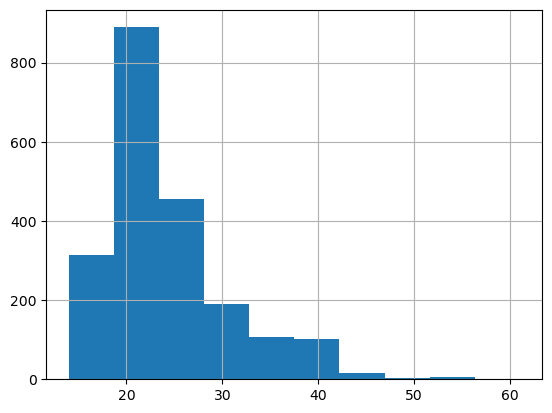

In [17]:
df.Age.hist()

In [18]:
def Age_transformation(df, col):
    df['Age_transformed'] = np.where(df[col] > 50, 5,
                            np.where(df[col] > 40, 4,
                            np.where(df[col] > 30, 3,
                            np.where(df[col] > 18, 2, 1))))
    
    df.drop(col, axis=1, inplace=True)
    
    
Age_transformation(df, 'Age')
df.head()

,Gender,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Age_transformed
0,0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,243865.264441,2
1,0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,242382.271468,2
2,1,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,237654.320988,2
3,1,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,3,268518.518519,2
4,1,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,3,283423.810125,2


<AxesSubplot:>

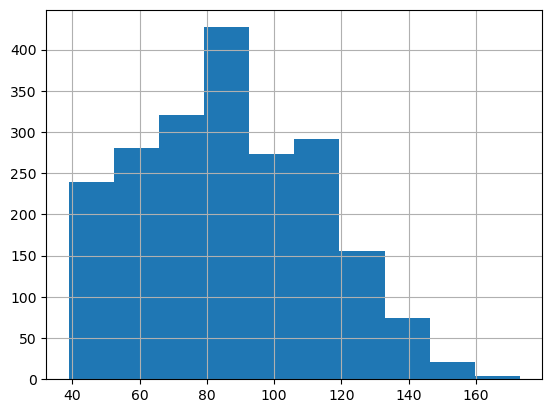

In [19]:
df.Weight.hist()

In [20]:
"""
def Weight_transformation(df, col):
    df['Weight_transformed'] =  np.where(df[col] > 120, 6,
                                np.where(df[col] > 100, 5,
                                np.where(df[col] > 80, 4,
                                np.where(df[col] > 60, 3, 
                                np.where(df[col] > 40, 2,1)))))
    
    df.drop(col, axis=1, inplace=True)
                                         
Weight_transformation(df, 'Weight')
df.head()
"""

"\ndef Weight_transformation(df, col):\n    df['Weight_transformed'] =  np.where(df[col] > 120, 6,\n                                np.where(df[col] > 100, 5,\n                                np.where(df[col] > 80, 4,\n                                np.where(df[col] > 60, 3, \n                                np.where(df[col] > 40, 2,1)))))\n    \n    df.drop(col, axis=1, inplace=True)\n                                         \nWeight_transformation(df, 'Weight')\ndf.head()\n"

In [21]:
#df.Height.hist()
df.drop(["Weight", "Height"], axis=1, inplace =True)

In [22]:
df.dtypes

Gender                              int64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
BMI                               float64
Age_transformed                     int32
dtype: object

In [23]:
df.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad', 'BMI', 'Age_transformed'],
      dtype='object')

In [24]:
df.reindex(columns=['Gender', 'Age_transformed', 'BMI', 'family_history_with_overweight', 'FAVC', 'FCVC','NCP', 'CAEC', 
                    'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS','NObeyesdad'])

,Gender,Age_transformed,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,2,243865.264441,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,2,242382.271468,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,2,237654.320988,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,2,268518.518519,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,3
4,1,2,283423.810125,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,0,2,449014.750007,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,0
2083,0,2,437419.233525,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,0
2084,0,2,435438.165841,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,0
2085,0,2,440715.354033,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss


X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = df['NObeyesdad'])


In [26]:
models = []

models.append(('LogisticReg',LogisticRegression()))
models.append(('KNeighborsClf',KNeighborsClassifier()))
models.append(('DecisionTreeClf',DecisionTreeClassifier()))
models.append(('RandomForestClf',RandomForestClassifier()))

In [27]:
metrics = pd.DataFrame(index=['Train_Accuracy', 'Test_Accuracy','CV_Accuracy', 
                              'precision', 'recall', 'f1_Score', 'roc_auc', 'log_loss'],
                       columns=['LogisticReg','KNeighborsClf', 'DecisionTreeClf', 'RandomForestClf'])
metrics

,LogisticReg,KNeighborsClf,DecisionTreeClf,RandomForestClf
Train_Accuracy,NaN,NaN,NaN,NaN
Test_Accuracy,NaN,NaN,NaN,NaN
CV_Accuracy,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN
f1_Score,NaN,NaN,NaN,NaN
roc_auc,NaN,NaN,NaN,NaN
log_loss,NaN,NaN,NaN,NaN


In [28]:
for name, model in models:
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    metrics.loc['Train_Accuracy', name] = round(train_accuracy*100,2)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    metrics.loc['Test_Accuracy', name] = round(test_accuracy*100,2)

    cv_result = cross_val_score(model, X_train, y_train, cv = 3, scoring ='accuracy')
    print(f"{name:{13}} {cv_result} {cv_result.mean():{18}} {cv_result.std():{18}}")
    metrics.loc['CV_Accuracy', name] = round(cv_result.mean()*100,2)
    
    precision = precision_score(y_test, y_test_pred, average="weighted")
    metrics.loc['precision', name] = round(precision*100,2)

    recall = recall_score(y_test, y_test_pred, average="weighted")
    metrics.loc['recall', name] = round(recall*100,2)
    
    f1_Score = f1_score(y_test, y_test_pred, average="weighted")
    metrics.loc['f1_Score', name] = round(f1_Score*100,2)
    
  
    # Probablities based scores
    y_preb_probs = model.predict_proba(X_test)

    roc_auc = roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class = "ovr")
    metrics.loc['roc_auc', name] = round(roc_auc*100,2)
    
    logloss = log_loss(y_test, y_preb_probs)
    metrics.loc['log_loss', name] = logloss
    
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix for", name)
    print(confusion_matrix(y_test, y_test_pred))  
    print("-----------------------------------------------")

    

LogisticReg   [0.31059246 0.31115108 0.30935252] 0.31036535224244305 0.0007516155352073824
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.00      0.00      0.00        57
           2       0.31      1.00      0.47       130
           3       0.00      0.00      0.00       113
           4       0.00      0.00      0.00        53

    accuracy                           0.31       418
   macro avg       0.06      0.20      0.09       418
weighted avg       0.10      0.31      0.15       418

Confusion Matrix for LogisticReg
[[  0   0  65   0   0]
 [  0   0  57   0   0]
 [  0   0 130   0   0]
 [  0   0 113   0   0]
 [  0   0  53   0   0]]
-----------------------------------------------


C:\Users\ricky\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ricky\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ricky\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ricky\anaconda3\lib\site-packages\sklearn\metrics\_classifi

KNeighborsClf [0.96947935 0.97661871 0.9676259 ] 0.9712413193323259 0.0038769430446691676
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        65
           1       0.89      0.98      0.93        57
           2       0.97      0.95      0.96       130
           3       0.99      0.94      0.96       113
           4       1.00      0.96      0.98        53

    accuracy                           0.95       418
   macro avg       0.95      0.96      0.95       418
weighted avg       0.96      0.95      0.95       418

Confusion Matrix for KNeighborsClf
[[ 63   0   2   0   0]
 [  0  56   0   1   0]
 [  7   0 123   0   0]
 [  0   5   2 106   0]
 [  0   2   0   0  51]]
-----------------------------------------------
DecisionTreeClf [0.98743268 0.98561151 0.99100719] 0.9880171266936181 0.0022412106518823805
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        65
           1       0.

In [29]:
metrics

,LogisticReg,KNeighborsClf,DecisionTreeClf,RandomForestClf
Train_Accuracy,31.04,97.6,100.0,100.0
Test_Accuracy,31.1,95.45,97.13,99.04
CV_Accuracy,31.04,97.12,98.8,98.86
precision,9.67,95.7,97.14,99.05
recall,31.1,95.45,97.13,99.04
f1_Score,14.76,95.5,97.13,99.05
roc_auc,58.17,99.03,98.16,99.99
log_loss,1.47989,0.551469,0.991544,0.123259
